In [ ]:
from model_CNN import UrbanCNN
import torch 
import itertools

model = UrbanCNN(num_classes=10)  # or whatever your class is


In [5]:
model.load_state_dict(torch.load('cnn_3couches.pt'))
model.eval()  # set model to evaluation mode

UrbanCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=15360, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [6]:
import pickle 

with open('test_data.pkl', 'rb') as f:
    test_data_df = pickle.load(f)


In [7]:
len(test_data_df)

873

In [8]:
from class_CNN import DatasetClass
from torch.utils.data import DataLoader


sample_spec, sample_label = test_data_df[300]  # or any index
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_tensor = sample_spec.unsqueeze(0)  # shape: (1, 1, 128, time)

print(sample_spec, sample_label)
print(sample_spec.shape, input_tensor.shape)

tensor([[[-57.7844, -53.9805, -50.3212,  ..., -49.6853, -44.0799, -80.0000],
         [-49.9300, -48.3606, -49.4901,  ..., -46.9141, -43.1087, -80.0000],
         [-49.5342, -47.3756, -48.9317,  ..., -44.3697, -45.2459, -80.0000],
         ...,
         [-76.3680, -72.2477, -59.2317,  ..., -48.5170, -53.0042, -80.0000],
         [-79.5369, -76.6428, -68.8046,  ..., -49.7771, -52.9823, -80.0000],
         [-80.0000, -80.0000, -80.0000,  ..., -63.2128, -57.4010, -80.0000]]]) tensor(1)
torch.Size([1, 128, 127]) torch.Size([1, 1, 128, 127])


In [9]:

with torch.no_grad():
    output = model(input_tensor)
    predicted_class = torch.argmax(output, dim=1).item()


print(f"Predicted class: {predicted_class}")
print(f"True class: {sample_label.item()}")



Predicted class: 1
True class: 1


In [10]:
#test on all data 

from torch.utils.data import DataLoader
import torch


test_loader = DataLoader(test_data_df, batch_size=32, shuffle=False)

len(test_loader)

28

In [11]:


# 2. Send model to device and set to eval mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# 3. Initialize counters
correct = 0
total = 0

all_label = []
all_pred = []

# 4. Evaluation loop
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1)

        correct += (predictions == labels).sum().item()
        total += labels.size(0)
        
        all_label.extend(labels.cpu().numpy())
        all_pred.extend(predictions.cpu().numpy())
        
# 5. Compute and print accuracy
accuracy = correct / total
print(f"✅ Accuracy on full test set: {accuracy:.2%}")


✅ Accuracy on full test set: 83.16%


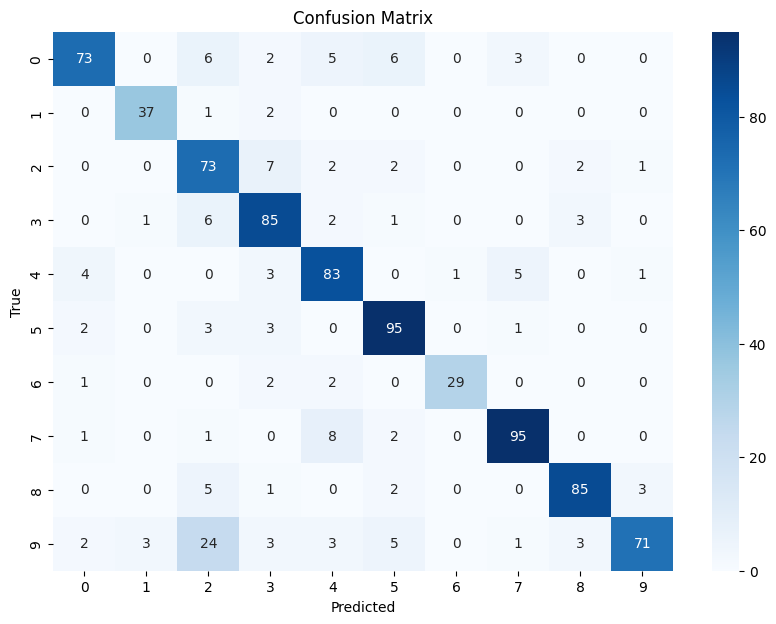

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_label, all_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
